# Daten importieren

In [1]:
import pandas as pd

df = pd.read_csv("employees_punctuality_mixed.csv")
df

,Transportation,Weather Condition,Distance from Work (km),Age,Arrival on Time
0,Car,Rainy,7.0,24,True
1,Bus,Rainy,10.8,44,True
2,Bus,Snowy,9.2,46,False
3,Car,Sunny,10.7,38,False
4,Bus,Rainy,10.4,42,True
...,...,...,...,...,...
102,Bus,Snowy,12.2,39,False
103,Car,Rainy,5.0,55,True
104,Bicycle,Snowy,10.8,38,True
105,Bus,Rainy,4.0,55,True


In [2]:
df.describe()

,Distance from Work (km),Age
count,107.000000,107.000000
mean,9.924299,42.401869
std,2.293380,8.889107
min,3.800000,19.000000
25%,8.500000,36.500000
50%,10.100000,43.000000
75%,11.200000,48.000000
max,16.100000,65.000000


# Verteilungen visualisieren

<Axes: xlabel='Distance from Work (km)', ylabel='Count'>

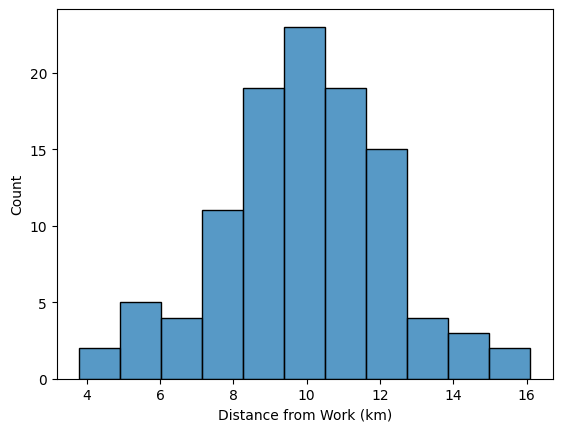

In [3]:
import seaborn as sns

sns.histplot(df["Distance from Work (km)"])

<Axes: xlabel='Age', ylabel='Count'>

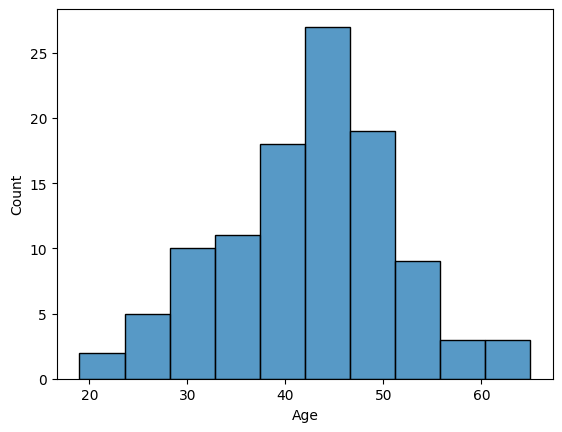

In [4]:
sns.histplot(df["Age"])

# Daten aufteilen

In [5]:
X = df.copy()
y = X.pop("Arrival on Time")

In [6]:
X

,Transportation,Weather Condition,Distance from Work (km),Age
0,Car,Rainy,7.0,24
1,Bus,Rainy,10.8,44
2,Bus,Snowy,9.2,46
3,Car,Sunny,10.7,38
4,Bus,Rainy,10.4,42
...,...,...,...,...
102,Bus,Snowy,12.2,39
103,Car,Rainy,5.0,55
104,Bicycle,Snowy,10.8,38
105,Bus,Rainy,4.0,55


In [7]:
y

0       True
1       True
2      False
3      False
4       True
       ...  
102    False
103     True
104     True
105     True
106     True
Name: Arrival on Time, Length: 107, dtype: bool

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [9]:
X_train

,Transportation,Weather Condition,Distance from Work (km),Age
13,Bus,Snowy,9.6,43
31,Car,Rainy,10.4,39
51,Car,Sunny,12.1,52
34,Car,Sunny,9.9,57
62,Bicycle,Sunny,9.2,23
...,...,...,...,...
37,Bicycle,Snowy,12.0,31
0,Car,Rainy,7.0,24
45,Car,Sunny,15.2,53
64,Bicycle,Sunny,10.3,59


# Kategorische Features transformieren

In [10]:
from sklearn.preprocessing import OrdinalEncoder

categorical_features = ["Transportation", "Weather Condition"]
ordinal_encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
ordinal_encoder.fit(X_train[categorical_features])

cat_train_features_encoded = pd.DataFrame(ordinal_encoder.transform(X_train[categorical_features]), columns=categorical_features, index=X_train.index)
cat_test_features_encoded = pd.DataFrame(ordinal_encoder.transform(X_test[categorical_features]), columns=categorical_features, index=X_test.index)

In [11]:
cat_train_features_encoded

,Transportation,Weather Condition
13,1.0,1.0
31,2.0,0.0
51,2.0,2.0
34,2.0,2.0
62,0.0,2.0
...,...,...
37,0.0,1.0
0,2.0,0.0
45,2.0,2.0
64,0.0,2.0


In [14]:
X_train_encoded = pd.concat([cat_train_features_encoded, X_train[["Distance from Work (km)", "Age"]]], axis=1)
X_test_encoded = pd.concat([cat_test_features_encoded, X_test[["Distance from Work (km)", "Age"]]], axis=1)

In [21]:
X_train_encoded

,Transportation,Weather Condition,Distance from Work (km),Age
13,1.0,1.0,9.6,43
31,2.0,0.0,10.4,39
51,2.0,2.0,12.1,52
34,2.0,2.0,9.9,57
62,0.0,2.0,9.2,23
...,...,...,...,...
37,0.0,1.0,12.0,31
0,2.0,0.0,7.0,24
45,2.0,2.0,15.2,53
64,0.0,2.0,10.3,59


# AUSNAHME: Zielvariable transformieren

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_encoded = pd.Series(label_encoder.transform(y_train), index=y_train.index)
y_test_encoded = pd.Series(label_encoder.transform(y_test), index=y_test.index)

In [18]:
y_train

13     True
31    False
51    False
34     True
62     True
      ...  
37    False
0      True
45     True
64    False
91     True
Name: Arrival on Time, Length: 85, dtype: bool

In [19]:
y_train_encoded

13    1
31    0
51    0
34    1
62    1
     ..
37    0
0     1
45    1
64    0
91    1
Length: 85, dtype: int64

# Mixed Naive Bayes - Modell trainieren


In [20]:
!pip install mixed-naive-bayes

In [22]:
from mixed_naive_bayes import MixedNB

model = MixedNB(categorical_features=[0, 1])
model.fit(X_train_encoded, y_train_encoded)

MixedNB(alpha=0.5, var_smoothing=1e-09)

# Finale Accuracy

In [23]:
from sklearn.metrics import accuracy_score

y_predict = model.predict(X_test_encoded)
accuracy = accuracy_score(y_test_encoded, y_predict)

print("Final Accuracy:", accuracy)

Final Accuracy: 0.7272727272727273


# Confusion Matrix

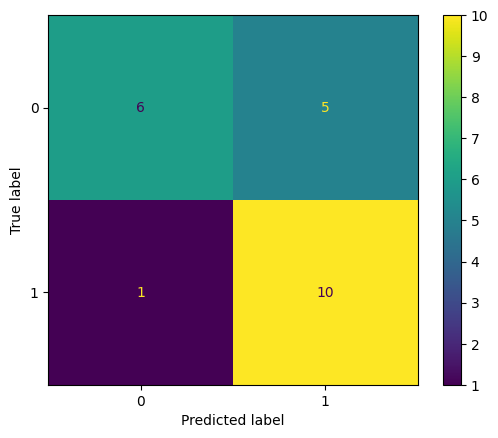

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_predict)